In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
import numpy as np


In [19]:
root = Path.cwd().parent

five_fold_results_dir = root / "RESULTS_fiveFold" / "results"
five_fold_aggregated_csv = five_fold_results_dir / "results5Fold_summary_combined.csv" 

df = pd.read_csv(five_fold_aggregated_csv)

In [20]:
# Set style and palette globally
sns.set(style="whitegrid")
palette = 'colorblind'

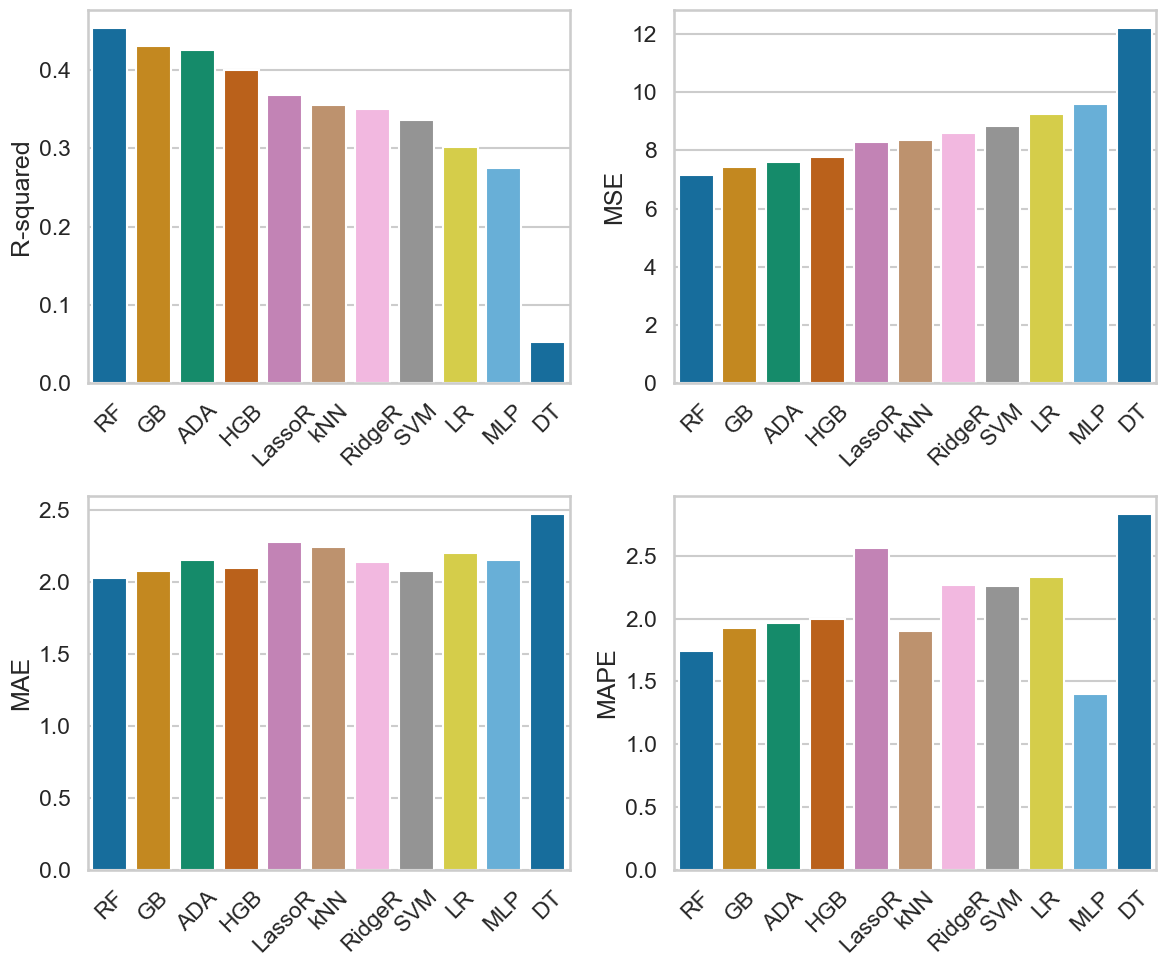

In [21]:
# Filter: all methods/features off
filtered_df = df[
    (df["lowVarianceDrop"] == False) &
    (df["dropExecTime"] == False) &
    (df["rfecv"] == False) &
    (df["kbest"] == False) &
    (df["autospearman"] == False) &
    (df["hyperparameters"] == False)
]

# Sort by R² descending
filtered_df = filtered_df.sort_values(by="r2_mean", ascending=False)

# Set seaborn style
sns.set(style="whitegrid", context="talk")
palette = 'colorblind'

# Create 2×2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Metrics and labels
metrics = ["r2_mean", "mse_mean", "mae_mean", "mape_mean"]
y_labels = ["R-squared", "MSE", "MAE", "MAPE"]

# Plot each subplot
for ax, metric, y_label in zip(axes.flat, metrics, y_labels):
    sns.barplot(x="model_name", y=metric, data=filtered_df, palette=palette, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(y_label)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()

# Save plot
plt.savefig("plt_RQ1_allModels_allMetrics.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()
